image shape: torch.Size([1, 1, 366, 278, 160]), seg shape: torch.Size([1, 1, 366, 278, 160])


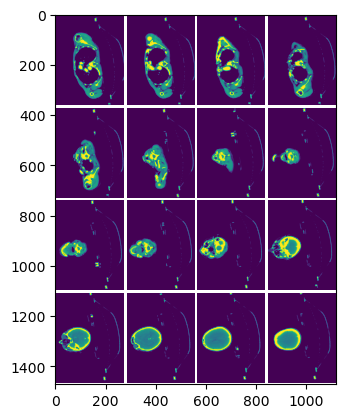

In [75]:
from monai.transforms import (
    EnsureChannelFirstd,
    Compose,
    LoadImaged,
    ScaleIntensityRanged,
    Spacingd,
    Rotated,
    CropForegroundd,
)
import matplotlib.pyplot as plt

from monai.data import DataLoader, Dataset
from monai.utils import first

from monai.visualize import matshow3d

images_to_transform = [
    "./benchmark/data/PDDCA-1.4.1_part1/0522c0001/img.nrrd",
    "./benchmark/data/PDDCA-1.4.1_part1/0522c0002/img.nrrd",
]

seg_to_transform = [
    "./benchmark/data/PDDCA-1.4.1_part1/0522c0001/structures/BrainStem.nrrd",
    "./benchmark/data/PDDCA-1.4.1_part1/0522c0002/structures/BrainStem.nrrd",
]

data_dicts = [
    {"image": image_name, "seg": seg_name}
    for image_name, seg_name in zip(images_to_transform, seg_to_transform)
]

transform = Compose(
    [
        LoadImaged(keys=["image", "seg"]),
        EnsureChannelFirstd(keys=["image", "seg"]),
        Spacingd(
            keys=["image", "seg"], pixdim=(1.5, 1.5, 2.0), mode=("bilinear", "nearest")
        ),
        ScaleIntensityRanged(
            keys=["image"], a_min=-57, a_max=164, b_min=0.0, b_max=1.0, clip=True
        ),
        Rotated(keys="image", angle=3),
        CropForegroundd(keys=["image", "seg"], source_key="image"),
    ]
)
#
dataset = Dataset(data=data_dicts, transform=transform)
loader = DataLoader(dataset, batch_size=1)
data = first(loader)
print(f"image shape: {data['image'].shape}, seg shape: {data['seg'].shape}")

plot = matshow3d(
    volume=data["image"],
    fig=None,
    title="input image",
    figsize=(100, 100),
    every_n=10,
    frame_dim=-1,
    show=True,
    cmap="gray",
)
# create the figure
fig = plt.figure()

# show the reference image
ax1 = fig.add_subplot()
ax1.imshow(list(plot[1]))

fig.savefig("./test.png")


In [ ]:
from monai.transforms import (
    EnsureChannelFirstd,
    Compose,
    LoadImaged,
    ScaleIntensityRanged,
    Spacingd,
    Rotated,
    CropForegroundd,
)
from monai.data import DataLoader, Dataset
from monai.utils import first
from monai.visualize import matshow3d

images_to_transform = [
    "./benchmark/data/PDDCA-1.4.1_part1/0522c0001/img.nrrd",
    "./benchmark/data/PDDCA-1.4.1_part1/0522c0002/img.nrrd",
]

seg_to_transform = [
    "./benchmark/data/PDDCA-1.4.1_part1/0522c0001/structures/BrainStem.nrrd",
    "./benchmark/data/PDDCA-1.4.1_part1/0522c0002/structures/BrainStem.nrrd",
]

data_dicts = [
    {"image": image_name, "seg": seg_name}
    for image_name, seg_name in zip(images_to_transform, seg_to_transform)
]

# Definizione delle trasformazioni da applicare in ordine alle immagini e alle etichette utilizzando Compose di MONAI
transform = Compose(
    [
        # Carica l'immagine e l'etichetta specificate nei campi "image" e "seg" del dizionario di dati. 
        # MONAI supporta la lettura di una varietà di formati di immagini mediche, come NIfTI, NRRD, DICOM.
        LoadImaged(keys=["image", "seg"]),
        
        #Garantisce che le dimensioni dei canali delle immagini siano spostate nella posizione che precede le dimensioni 
        # di altezza e larghezza. Questo è necessario perché molte delle operazioni di elaborazione delle immagini 
        # in PyTorch (alla base di MONAI) si aspettano che i canali siano nella prima dimensione (C, H, W).
        EnsureChannelFirstd(keys=["image", "seg"]),
        
        # Cambia la spaziatura degli assi dell'immagine. L'argomento  \emph{pixdim} specifica la nuova spaziatura, 
        # in millimetri, per ciascun asse dell'immagine. L'argomento \emph{mode} specifica il metodo di interpolazione 
        # per adattare l'immagine alle nuove dimensioni.
        Spacingd(
            keys=["image", "seg"], pixdim=(1.5, 1.5, 2.0), mode=("bilinear", "nearest")
        ),
        
        # Scala l'intensità dei valori dei pixel dell'immagine all'intervallo specificato. Gli argomenti  \emph{a_min} e
        # \emph{a_max} specificano l'intervallo di intensità dell'immagine originale, mentre  \emph{b_min} e  \emph{b_max} 
        # specificano il nuovo intervallo di intensità desiderato. L'argomento  \emph{clip} impostato su True garantisce 
        # che i valori vengano troncati all'intervallo specificato se sono fuori dai limiti.

        ScaleIntensityRanged(
            keys=["image"], a_min=-57, a_max=164, b_min=0.0, b_max=1.0, clip=True
        ),
        
        # Ruota l'immagine di un angolo specificato in gradi, in questo caso 3 gradi.
        Rotated(keys="image", angle=3),
        
        # Ritaglia le immagini conservando solo la regione con informazioni rilevanti, eliminando gli spazi vuoti e 
        # lo sfondo. L'argomento  \emph{source_key} specifica quale campo del dizionario verrà utilizzato come 
        # immagine di riferimento per determinare quali regioni mantenere, in questo caso l'immagine.
        CropForegroundd(keys=["image", "seg"], source_key="image"),
    ]
)
# Creazione del dataset utilizzando il \emph{Dataset} di MONAI, specificando il dizionario di dati e le trasformazioni da applicare
dataset = Dataset(data=data_dicts, transform=transform)
# Creazione del DataLoader per ottenere i batch delle immagini
loader = DataLoader(dataset, batch_size=32)
# Caricamento del primo batch di dati utilizzando \emph{first} di MONAI
data = first(loader)

# Visualizzazione del volume 3D dell'immagine utilizzando \emph{matshow3d} di MONAI
matshow3d(
    volume=data["image"],
    fig=None,
    title="input image",
    figsize=(100, 100),
    every_n=10,
    frame_dim=-1,
    show=True,
    cmap="gray",
)


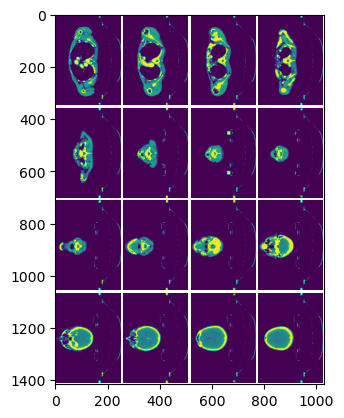

In [78]:
from monai.transforms import (
    EnsureChannelFirstd,
    Compose,
    LoadImaged,
    ScaleIntensityRanged,
    Spacingd,
    Rotated,
    CropForegroundd,
)
from monai.data import DataLoader, Dataset
from monai.utils import first
from monai.visualize import matshow3d

images_to_transform = [
    "./benchmark/data/PDDCA-1.4.1_part1/0522c0001/img.nrrd",
    "./benchmark/data/PDDCA-1.4.1_part1/0522c0002/img.nrrd",
]

seg_to_transform = [
    "./benchmark/data/PDDCA-1.4.1_part1/0522c0001/structures/BrainStem.nrrd",
    "./benchmark/data/PDDCA-1.4.1_part1/0522c0002/structures/BrainStem.nrrd",
]

data_dicts = [
    {"image": image_name, "seg": seg_name}
    for image_name, seg_name in zip(images_to_transform, seg_to_transform)
]

# Definizione delle trasformazioni da applicare in ordine alle immagini e alle etichette utilizzando Compose di MONAI
transform = Compose(
    [
        # Carica l'immagine e l'etichetta specificate nei campi "image" e "seg" del dizionario di dati. 
        # MONAI supporta la lettura di una varietà di formati di immagini mediche, come NIfTI, NRRD, DICOM.
        LoadImaged(keys=["image", "seg"]),
        
        #Garantisce che le dimensioni dei canali delle immagini siano spostate nella posizione che precede le dimensioni 
        # di altezza e larghezza. Questo è necessario perché molte delle operazioni di elaborazione delle immagini 
        # in PyTorch (alla base di MONAI) si aspettano che i canali siano nella prima dimensione (C, H, W).
        EnsureChannelFirstd(keys=["image", "seg"]),
        
        # Cambia la spaziatura degli assi dell'immagine. L'argomento  \emph{pixdim} specifica la nuova spaziatura, 
        # in millimetri, per ciascun asse dell'immagine. L'argomento \emph{mode} specifica il metodo di interpolazione 
        # per adattare l'immagine alle nuove dimensioni.
        Spacingd(
            keys=["image", "seg"], pixdim=(1.5, 1.5, 2.0), mode=("bilinear", "nearest")
        ),
        
        # Scala l'intensità dei valori dei pixel dell'immagine all'intervallo specificato. Gli argomenti  \emph{a_min} e
        # \emph{a_max} specificano l'intervallo di intensità dell'immagine originale, mentre  \emph{b_min} e  \emph{b_max} 
        # specificano il nuovo intervallo di intensità desiderato. L'argomento  \emph{clip} impostato su True garantisce 
        # che i valori vengano troncati all'intervallo specificato se sono fuori dai limiti.

        ScaleIntensityRanged(
            keys=["image"], a_min=-57, a_max=164, b_min=0.0, b_max=1.0, clip=True
        ),
        
        # # Ruota l'immagine di un angolo specificato in gradi, in questo caso 3 gradi.
        # Rotated(keys="image", angle=3),
        
        # Ritaglia le immagini conservando solo la regione con informazioni rilevanti, eliminando gli spazi vuoti e 
        # lo sfondo. L'argomento  \emph{source_key} specifica quale campo del dizionario verrà utilizzato come 
        # immagine di riferimento per determinare quali regioni mantenere, in questo caso l'immagine.
        CropForegroundd(keys=["image", "seg"], source_key="image"),
    ]
)
# Creazione del dataset utilizzando il \emph{Dataset} di MONAI, specificando il dizionario di dati e le trasformazioni da applicare
dataset = Dataset(data=data_dicts, transform=transform)
# Creazione del DataLoader per ottenere i batch delle immagini
loader = DataLoader(dataset, batch_size=1)
# Caricamento del primo batch di dati utilizzando \emph{first} di MONAI
data = first(loader)

# Visualizzazione del volume 3D dell'immagine utilizzando \emph{matshow3d} di MONAI
plot = matshow3d(
    volume=data["image"],
    fig=None,
    title="input image",
    figsize=(100, 100),
    every_n=10,
    frame_dim=-1,
    show=True,
    cmap="gray",
)

# create the figure
fig = plt.figure()

# show the reference image
ax1 = fig.add_subplot()
ax1.imshow(list(plot[1]))

fig.savefig("./no_rotated.png")
